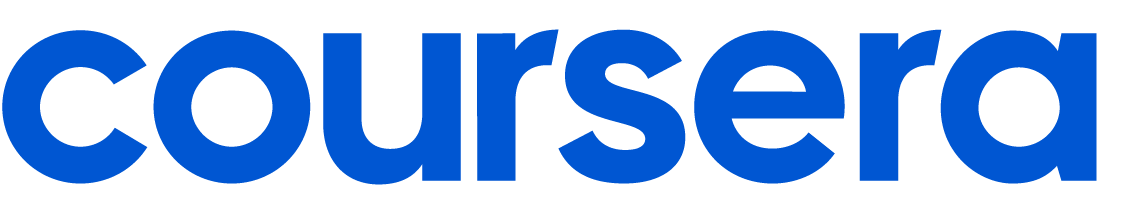

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [114]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [115]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
# Import any other packages you may want to use
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import f_classif , SelectKBest

#Instancing from "StandardScaler" object.
scaler = StandardScaler()

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [117]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [118]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [119]:
# your code here (optional)

#Separating label column.

label = train_df.Default

#Remving 'LoanID' and 'Default' columns from dataframe.

train_df = train_df.drop(['LoanID','Default'],axis=1)

#Separating column names with numeric and No_Numeric values.

num_cols = [col for col in train_df.columns if train_df[col].dtype!='O']
nan_cols = [col for col in train_df.columns if col not in num_cols]

#Making dataframes from numeric and No_Numeric columns.

train_df_num = train_df.drop(nan_cols,axis=1) #Dataframe with numeric values.
train_df_nan = train_df.drop(num_cols,axis=1) #Dataframe with No-Numeric values.

train_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 17.5 MB


In [120]:
train_df_num.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [121]:
train_df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Education       255347 non-null  object
 1   EmploymentType  255347 non-null  object
 2   MaritalStatus   255347 non-null  object
 3   HasMortgage     255347 non-null  object
 4   HasDependents   255347 non-null  object
 5   LoanPurpose     255347 non-null  object
 6   HasCoSigner     255347 non-null  object
dtypes: object(7)
memory usage: 13.6+ MB


In order to encode the No-Numeric dataframe there are two strategies. One Hot encoding and Normal encoding.
So lets find out how many unique values are there in each No-Numeric dataframe columns.

In [122]:
for col in train_df_nan.columns:
    print(col)
    print(len(train_df_nan[col].unique()))
    print('----------------------------------')

Education
4
----------------------------------
EmploymentType
4
----------------------------------
MaritalStatus
3
----------------------------------
HasMortgage
2
----------------------------------
HasDependents
2
----------------------------------
LoanPurpose
5
----------------------------------
HasCoSigner
2
----------------------------------


According to results winning strategy is One Hot encoding

In [123]:
#Making an unique dataframe from encoded No-Numeric dataframe and scaled numeric dataframe.

final = pd.concat([#scaling numeric dataframe.
                   pd.DataFrame(scaler.fit_transform(train_df_num),columns=train_df_num.columns),
                   #Encoding No_numeric dataframe.
                   pd.get_dummies(train_df_nan)],
                   axis=1)
final.sample(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
211,0.367019,-0.798279,-0.608096,1.168858,-1.430059,1.341937,0.359715,-0.708685,-1.430008,0,...,0,1,0,1,0,0,0,0,0,1
175278,-0.033242,-0.900813,-1.684767,-1.178478,-1.401193,-0.448549,1.691757,1.412793,1.341560,0,...,0,0,1,0,0,0,1,0,0,1
190875,-0.633633,1.264604,-0.095127,1.502393,-0.823881,-0.448549,0.472728,0.705634,-0.607199,0,...,0,1,0,1,0,0,0,0,0,1


In [124]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  float64
 1   Income                        255347 non-null  float64
 2   LoanAmount                    255347 non-null  float64
 3   CreditScore                   255347 non-null  float64
 4   MonthsEmployed                255347 non-null  float64
 5   NumCreditLines                255347 non-null  float64
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  float64
 8   DTIRatio                      255347 non-null  float64
 9   Education_Bachelor's          255347 non-null  uint8  
 10  Education_High School         255347 non-null  uint8  
 11  Education_Master's            255347 non-null  uint8  
 12  Education_PhD                 255347 non-nul

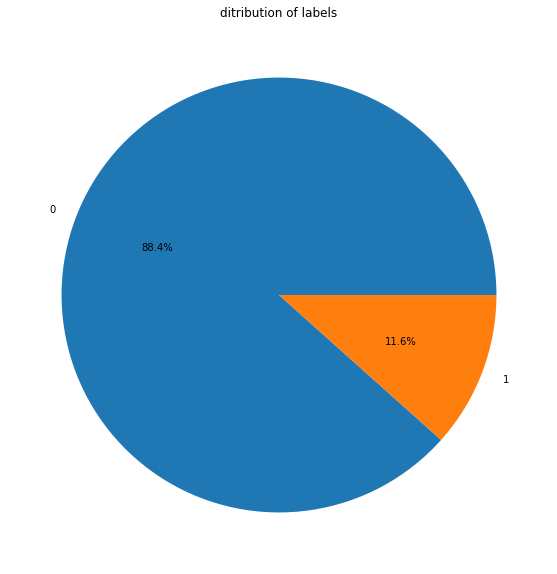

In [125]:
plt.figure(figsize=(10,10))
plt.pie(label.value_counts().values,labels=label.unique(),autopct='%1.1f%%')
plt.title('ditribution of labels')
plt.show()

Note 1: Distribution of labels is very unbalanced.
Note 2: Final dataframe contains 30 columns and it's too much.

So lets select third of dataframe coulmns by "SelectKBest" object.

In [126]:
selector = SelectKBest(score_func=f_classif,k=10)

#Feature selecting from "final" dataframe
new_df = selector.fit_transform(final,label)

#Getting selected column names.
mask = selector.get_support()

new_df = pd.DataFrame(new_df,columns=final.columns[mask])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        255347 non-null  float64
 1   Income                     255347 non-null  float64
 2   LoanAmount                 255347 non-null  float64
 3   MonthsEmployed             255347 non-null  float64
 4   InterestRate               255347 non-null  float64
 5   EmploymentType_Full-time   255347 non-null  float64
 6   EmploymentType_Unemployed  255347 non-null  float64
 7   HasDependents_Yes          255347 non-null  float64
 8   HasCoSigner_No             255347 non-null  float64
 9   HasCoSigner_Yes            255347 non-null  float64
dtypes: float64(10)
memory usage: 19.5 MB


In [127]:
#Splitting data to training and validating sets.
#80% of data is considered as training set.

train_x , test_x , train_y , test_y = train_test_split(new_df,label,test_size=0.2,random_state=32)
print(f'Train set size :{len(train_x)} samples.\nTest set size :{len(test_x)} samples.')

Train set size :204277 samples.
Test set size :51070 samples.


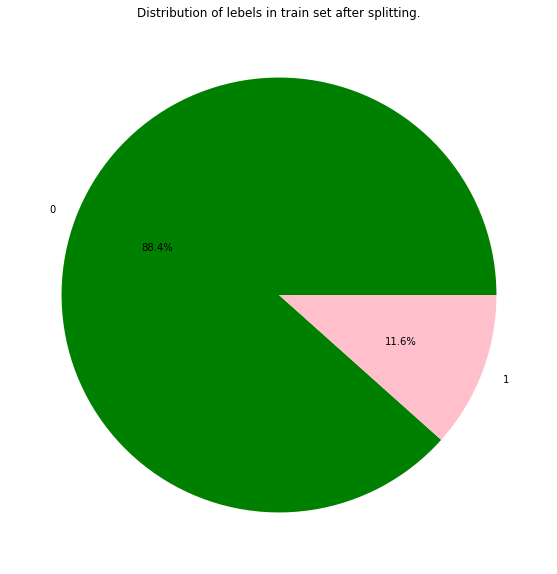

In [128]:
plt.figure(figsize=(10,10))
plt.pie([train_y.tolist().count(0),train_y.tolist().count(1)],
        labels=[0,1],
        autopct='%1.1f%%',
        colors=['green','pink'])
plt.title('Distribution of lebels in train set after splitting.')
plt.show()

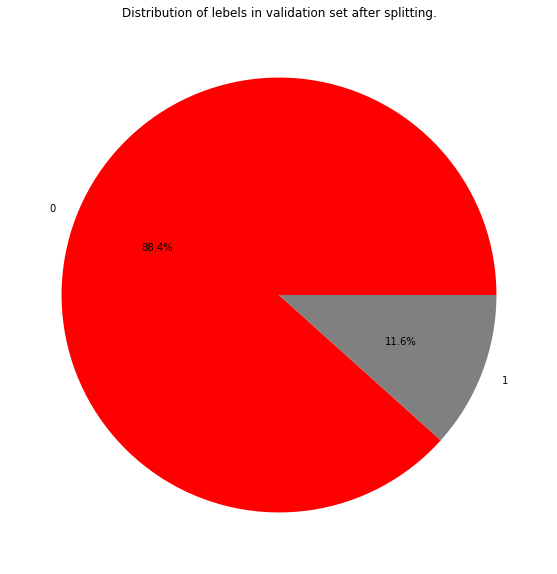

In [129]:
plt.figure(figsize=(10,10))
plt.pie([test_y.tolist().count(0),test_y.tolist().count(1)],
        labels=[0,1],
        autopct='%1.1f%%',
        colors=['red','gray'])
plt.title('Distribution of lebels in validation set after splitting.')
plt.show()

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [130]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit GradientBoostingClassifier on the feature columns in training set:
model = GradientBoostingClassifier()
model.fit(train_x,train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [131]:
print(f'Accuracy on train set :{model.score(train_x,train_y)*100:0.2f}%\nAccuracy on validation set :{model.score(test_x,test_y)*100:0.2f}%')

Accuracy on train set :88.66%
Accuracy on validation set :88.57%


In [132]:
#Preparing test file for prediction.

LoanID = test_df.LoanID
test_df = test_df.drop(['LoanID'],axis=1)

#Separating column names with numeric and No_Numeric values.

num_cols = [col for col in test_df.columns if test_df[col].dtype!='O']
nan_cols = [col for col in test_df.columns if col not in num_cols]

#Making dataframes from numeric and No_Numeric columns.

test_df_num = test_df.drop(nan_cols,axis=1) #Dataframe with numeric values.
test_df_nan = test_df.drop(num_cols,axis=1) #Dataframe with No-Numeric values.

#Making an unique dataframe from encoded No-Numeric dataframe and scaled numeric dataframe.

final_test = pd.concat([#scaling numeric dataframe
                        pd.DataFrame(scaler.fit_transform(test_df_num),columns=test_df_num.columns) ,
                        #Encoding No_numeric dataframe.
                        pd.get_dummies(test_df_nan)  ],
                        axis=1)
#Selecting selected columns from feature selection technique.      
final_test = final_test.drop([col for col in final_test.columns if col not in final.columns[mask]],axis=1)                       
                        
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        109435 non-null  float64
 1   Income                     109435 non-null  float64
 2   LoanAmount                 109435 non-null  float64
 3   MonthsEmployed             109435 non-null  float64
 4   InterestRate               109435 non-null  float64
 5   EmploymentType_Full-time   109435 non-null  uint8  
 6   EmploymentType_Unemployed  109435 non-null  uint8  
 7   HasDependents_Yes          109435 non-null  uint8  
 8   HasCoSigner_No             109435 non-null  uint8  
 9   HasCoSigner_Yes            109435 non-null  uint8  
dtypes: float64(5), uint8(5)
memory usage: 4.7 MB


In [133]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use GradientBoostingClassifier to make predictions on final_test using `predict` method:
predicted_probability = model.predict(final_test)

In [134]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': LoanID,
                             'predicted_probability': predicted_probability})

In [135]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0
1,JDL5RH07AM,0
2,STAL716Y79,0
3,SO0KKJ3IQB,0
4,T99CWTYDCP,0
5,0SNHFWV4UP,0
6,S6ITP6LGYS,0
7,A6I7U12IRJ,0
8,8W6KY50JU4,0
9,THFQ08OLMU,0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [136]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [137]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [138]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [139]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [140]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!